<a href="https://colab.research.google.com/github/vanesamp07/Python/blob/main/renuncias__1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTACIÓN DE LIBRERIAS Y PREPROCESAMIENTO DE DATOS

In [ ]:
from librerias import *

In [ ]:
#Analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Series de tiempo
import statsmodels as ss
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import sys
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import mse, rmse, meanabs


#Machine learning
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import mode
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve

#Ensamble
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv("telecom_churn.csv")

In [ ]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [ ]:
#Revisar datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
#Revisar datos faltantes
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [ ]:
#Revisar datos duplicados
df[df.duplicated()].sum()

Churn              0.0
AccountWeeks       0.0
ContractRenewal    0.0
DataPlan           0.0
DataUsage          0.0
CustServCalls      0.0
DayMins            0.0
DayCalls           0.0
MonthlyCharge      0.0
OverageFee         0.0
RoamMins           0.0
dtype: float64

##### Conclusión de análisis previo: no tenemos valores nulos ni duplicados

In [ ]:
df['DayCalls']

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: DayCalls, Length: 3333, dtype: int64

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

1. Churn (Variable objetivo): valor 1 si el cliente canceló el servicio, 0 si no
2. AccountWeeks: número de semanas que el cliente ha tenido activa la cuenta
3. ContractRenewal: toma el valor 1 si el cliente ha renovado recientemente el contrato,
0 en caso contrario
4. DataPlan: valor 1 si el cliente tiene plan de datos, 0 en caso contrario
5. DataUsage: Gigabytes de uso mensual de datos
6. CustServCalls: número de llamadas al servicio de atención al cliente
7. DayMins: promedio de minutos diurnos al mes
8. DayCalls: número medio de llamadas diurnas
9. MonthlyCharge: factura mensual media
10. OverageFee: mayor cuota de exceso en los últimos 12 meses
11. RoamMin: minutos de Roaming

In [ ]:
#Revisar médidas estadísticas
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
#Revisar correlacciones
df.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


#### Análisis básico de correlacciones significativas:

##### 1. Correlacción altamente positiva entre DataPlan y DataUsage (0.94): sí el cliente tiene plan de datos, probablemente usará máS Gigabytes mensualmente.
##### 2. Correlacción positiva entre DayMins y MonthlyCharge (0.56), DataUsage y MonthlyCharge (0.78): entre más minutos se consuman al mes y más se usen los datos, mayor será la facturación promedio para el cliente.
##### 3. Correlación negativa moderada entre ContractRenewal y Churn (-0.2598): quienes renovaron contrato tienden menos a irse (menos probabilidad de "churn").
##### 4. Correlación positiva baja entre CustServCalls y Churn (0.2087):  a más llamadas a servicio al cliente, ligeramente más probabilidad de churn.
##### 5. Correlación positiva baja entre DayCalls y Churn (0.018459):  a más menos numero de llamadas, ligeramente más probabilidad de churn.

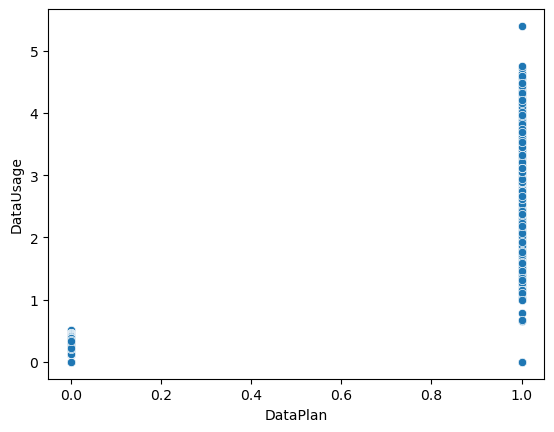

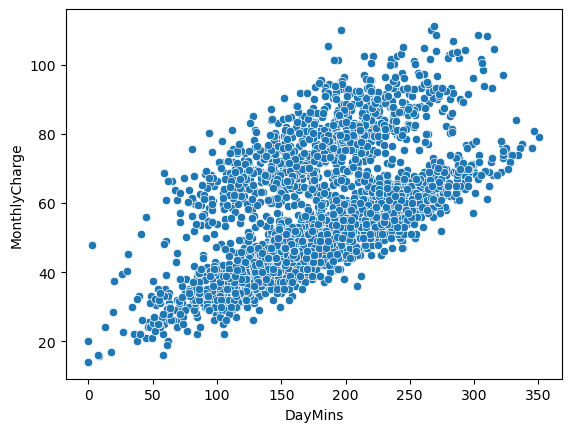

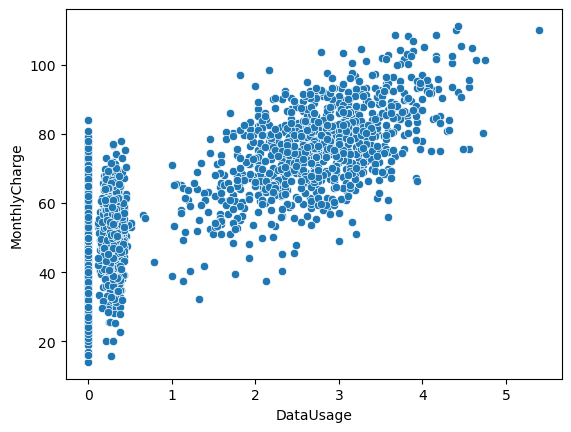

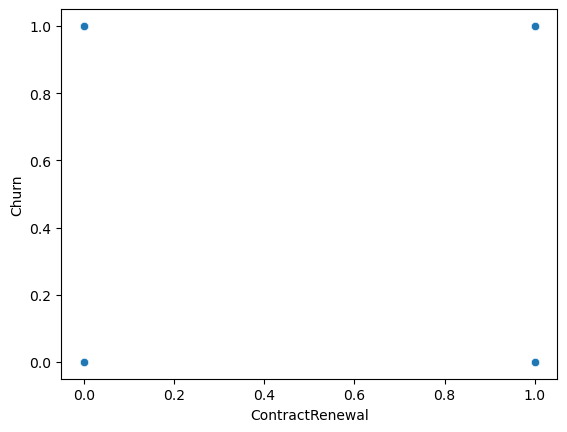

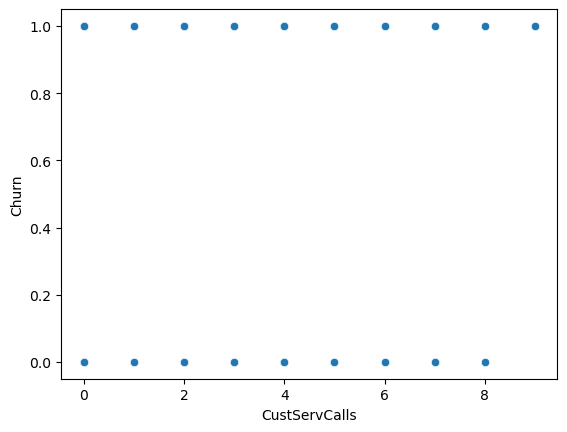

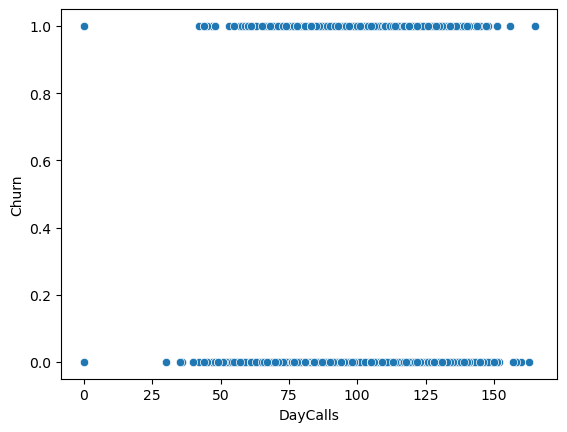

In [ ]:
#Graficar las correlaciones analizadas
sns.scatterplot(x=df["DataPlan"], y =df["DataUsage"])
plt.show()

sns.scatterplot(x=df["DayMins"], y =df["MonthlyCharge"])
plt.show()

sns.scatterplot(x=df["DataUsage"], y =df["MonthlyCharge"])
plt.show()

sns.scatterplot(x=df["ContractRenewal"], y =df["Churn"])
plt.show()

sns.scatterplot(x=df["CustServCalls"], y =df["Churn"])
plt.show()

sns.scatterplot(x=df["DayCalls"], y =df["Churn"])
plt.show()

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

CPU times: total: 9.56 s
Wall time: 11.6 s


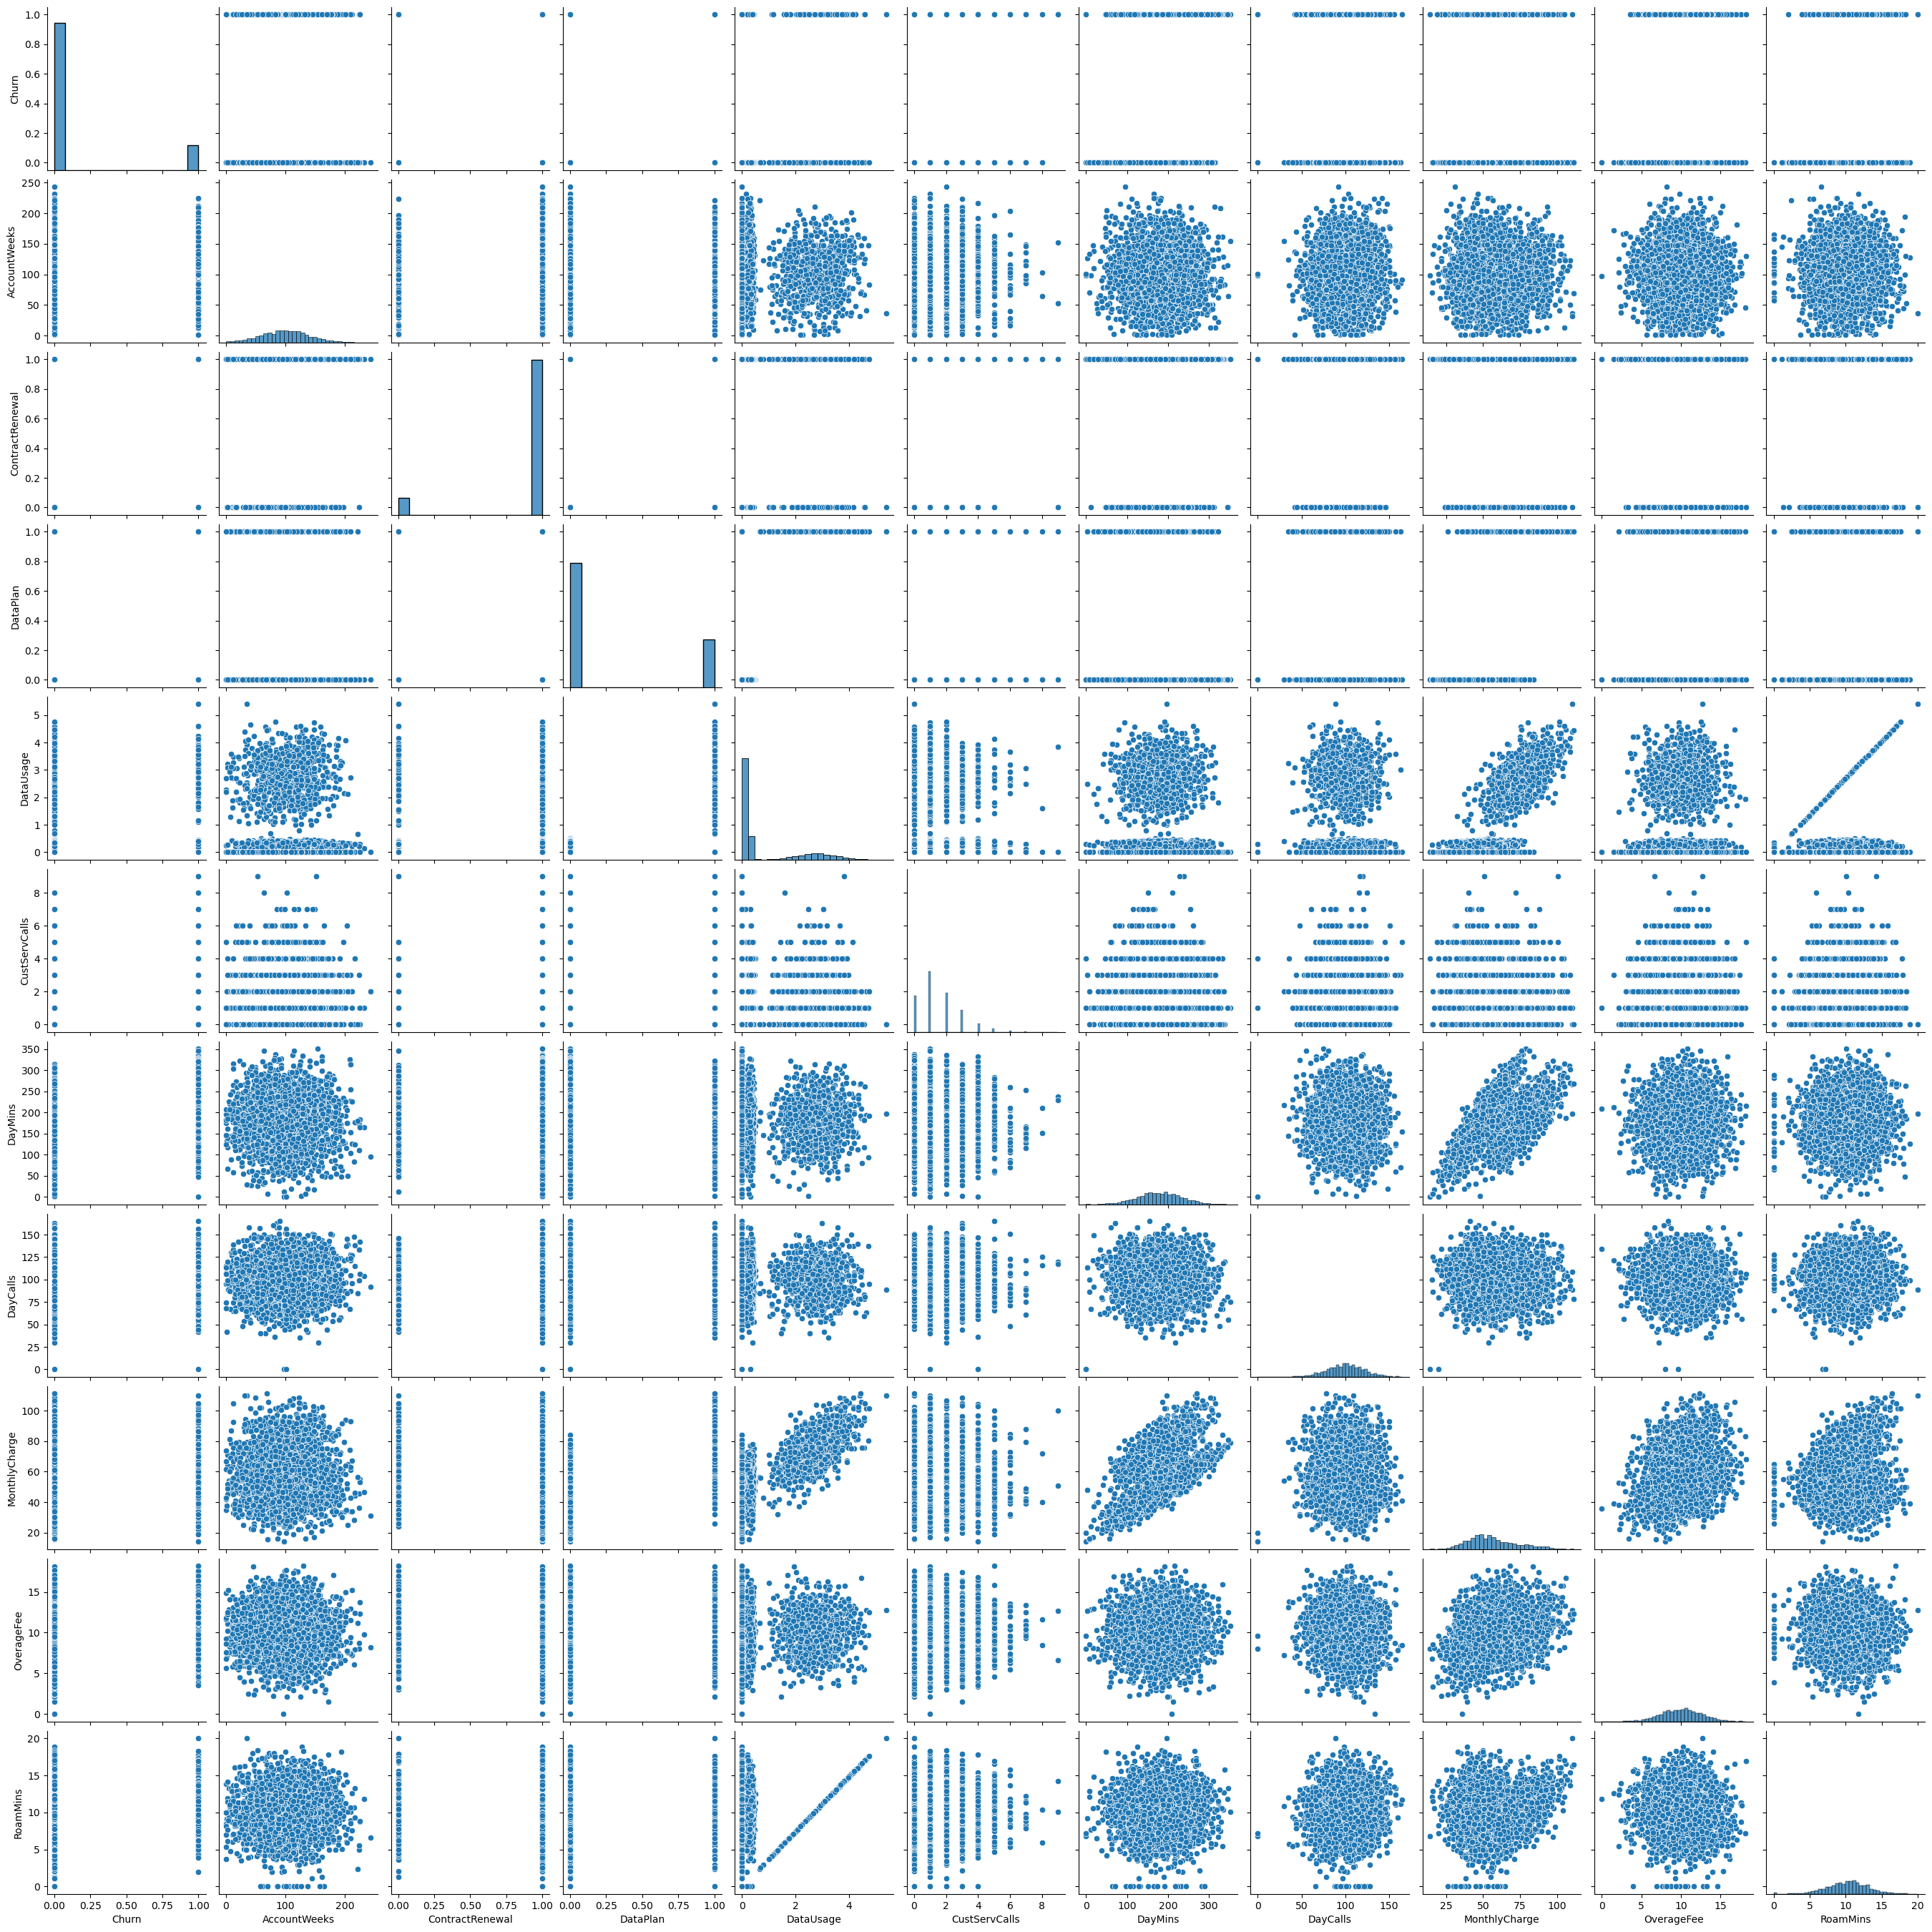

In [ ]:
%%time
#Analizar correlacciones entre todas las columnas mediante un pairplot
sns.pairplot(df)

<Axes: >

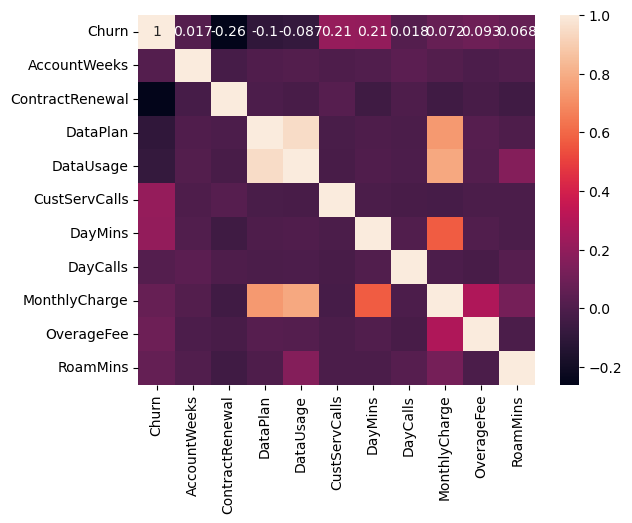

In [ ]:
#Analizar correlacciones graficando un heatmap (mapa de calor)
df_corr = df.corr(method='pearson')
sns.heatmap(data=df_corr, annot=True)

In [ ]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

CPU times: total: 2.02 s
Wall time: 1.17 s


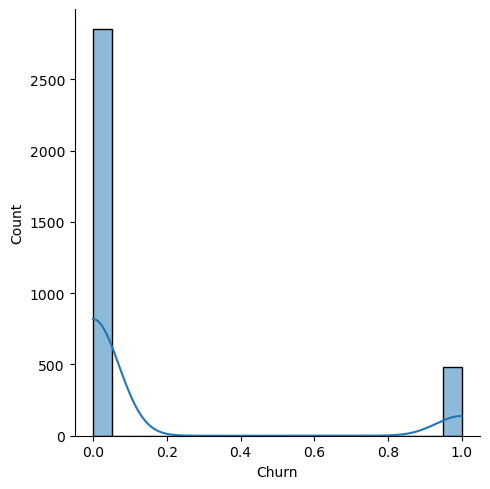

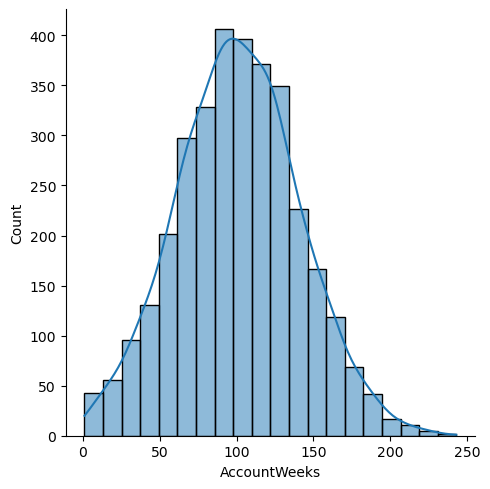

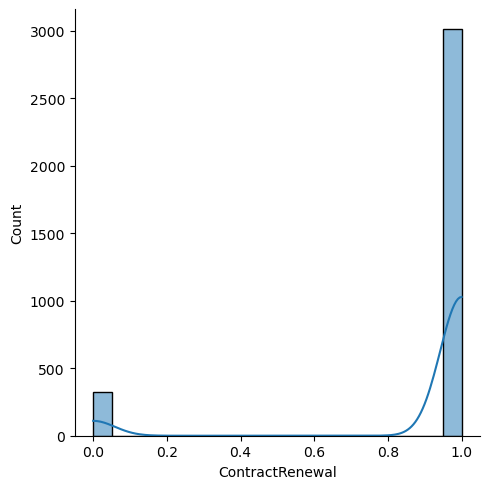

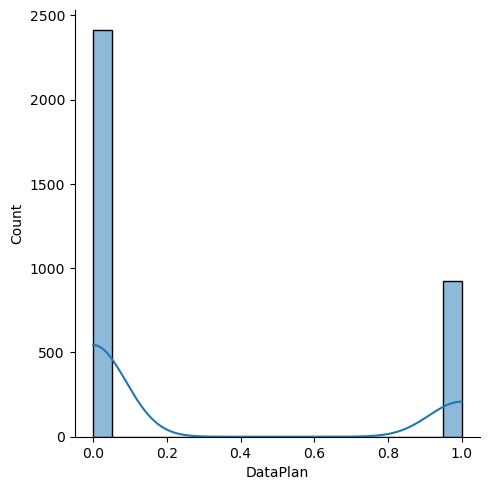

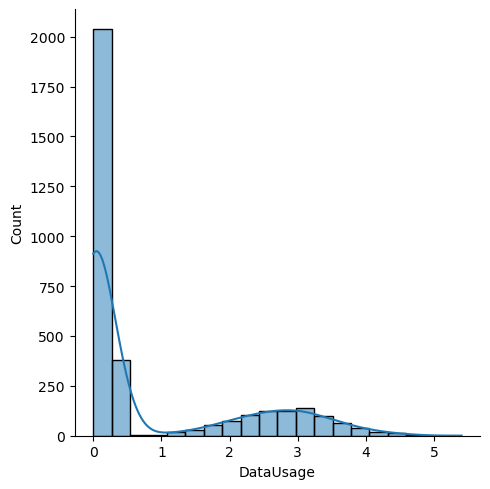

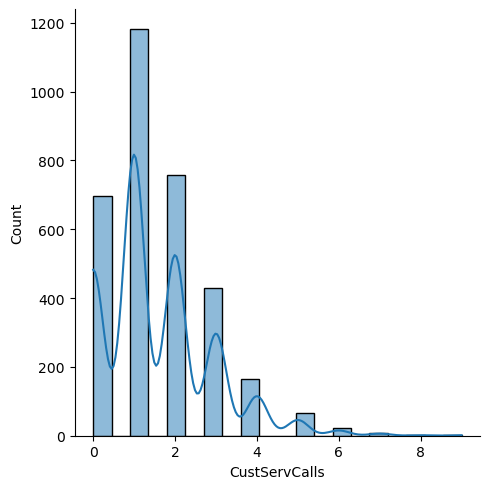

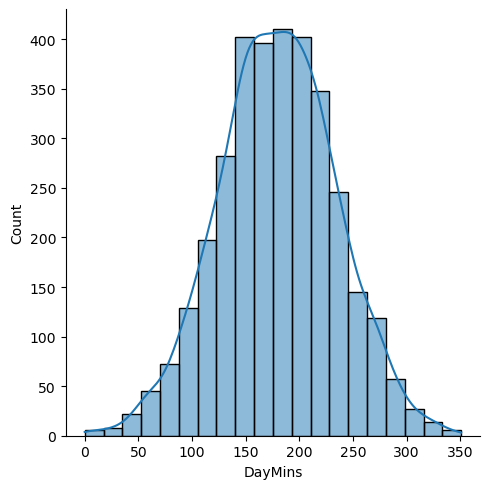

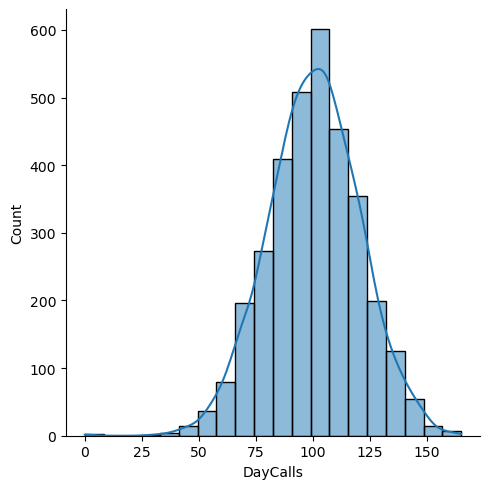

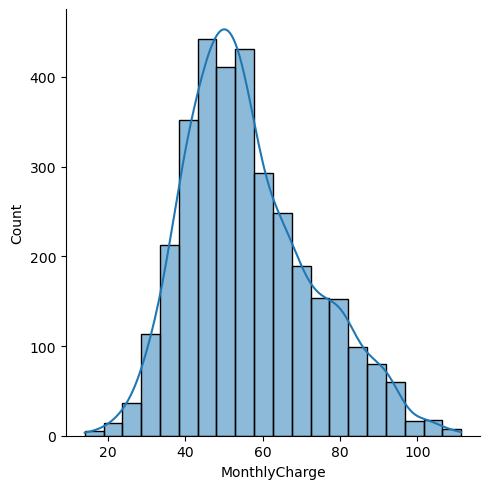

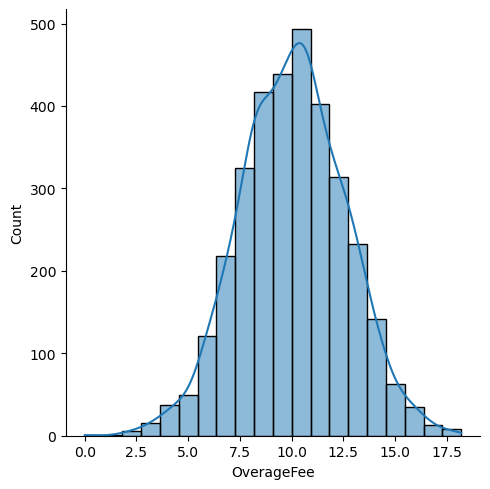

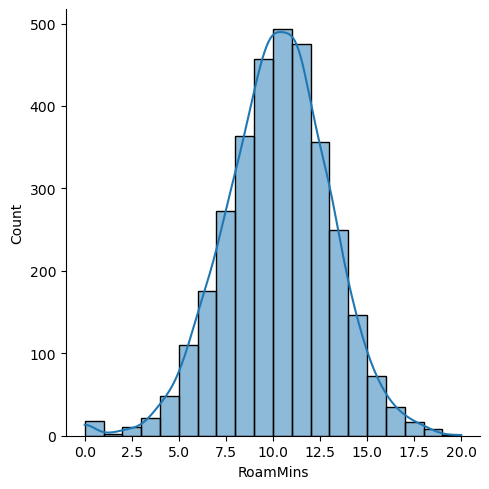

In [ ]:
%%time
#Revisar distribucción de datos mediantes displots
sns.displot(df["Churn"], bins = 20, kde = True)
sns.displot(df["AccountWeeks"], bins = 20, kde = True)
sns.displot(df["ContractRenewal"], bins = 20, kde = True)
sns.displot(df["DataPlan"], bins = 20, kde = True)
sns.displot(df["DataUsage"], bins = 20, kde = True)
sns.displot(df["CustServCalls"], bins = 20, kde = True)
sns.displot(df["DayMins"], bins = 20, kde = True)
sns.displot(df["DayCalls"], bins = 20, kde = True)
sns.displot(df["MonthlyCharge"], bins = 20, kde = True)
sns.displot(df["OverageFee"], bins = 20, kde = True)
sns.displot(df["RoamMins"], bins = 20, kde = True)

##### Análisis de los gráficos de distribucción de datos: mejor distribucción de datos en columnas --> AccountWeeks, DayMins, DayCalls (distribucción a la derecha), OverageFee y RoamMins

In [ ]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [ ]:
df["AccountWeeks"].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: AccountWeeks, dtype: float64

In [ ]:
#método de rango intercuartílico
Q1 = df["AccountWeeks"].quantile(0.25)
Q3 = df["AccountWeeks"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df[(df["AccountWeeks"] < Limite_inferior) | (df["AccountWeeks"] > Limite_superior)]

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")

Limite inferior: -5.5
Limite superior: 206.5
IQR: 53.0


In [ ]:
df["AccountWeeks"].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: AccountWeeks, dtype: float64

In [ ]:
print(127-74)

53


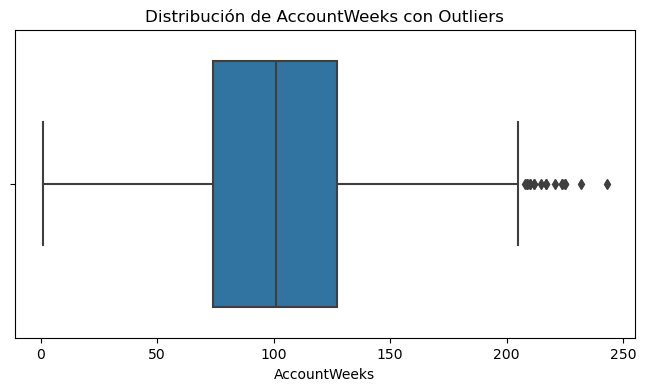

In [ ]:
#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["AccountWeeks"])
plt.title("Distribución de AccountWeeks con Outliers")
plt.xlabel("AccountWeeks")
plt.show()

##### Análisis: aprox, por encima de 200 semanas, tenemos datos atípicos. La mayoría de los datos de AccountWeeks están entre aprox. 50 y 170 semanas.

In [ ]:
#Imprimir outliers en todas las columnas
print(Outliers)

      Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
197       1           208                1         0       0.33   
238       0           215                1         0       0.31   
309       0           209                1         0       0.00   
416       1           224                0         0       0.26   
817       0           243                1         0       0.00   
1045      0           217                1         0       0.00   
1093      0           210                1         0       0.28   
1387      0           212                1         0       0.00   
1408      0           232                1         0       0.14   
1551      1           225                1         0       0.30   
1751      0           225                1         0       0.00   
1886      0           224                1         0       0.21   
2150      1           212                1         0       0.23   
2259      0           210                1         1       2.7

### MODELAMIENTO Y MÉTRICAS DE EVALUACIÓN

In [ ]:
# contando valores ausentes
[(x1, np.sum(x2.isnull())) for x1, x2 in df.items()]

[('Churn', 0),
 ('AccountWeeks', 0),
 ('ContractRenewal', 0),
 ('DataPlan', 0),
 ('DataUsage', 0),
 ('CustServCalls', 0),
 ('DayMins', 0),
 ('DayCalls', 0),
 ('MonthlyCharge', 0),
 ('OverageFee', 0),
 ('RoamMins', 0)]

In [ ]:
#Desarrollar modelo de árbol de decisión sin modificar sus hiper parámetros
RSTATE = 23124

X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=RSTATE)


print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

X_train: (2233, 10)
X_test: (1100, 10)


In [ ]:
model1 = DecisionTreeRegressor(random_state=RSTATE)

# training
model1.fit(X_train, y_train)

# prediction para conjunto de test
yhat_test = model1.predict(X_test)

# prediction para conjunto de test
yhat_train = model1.predict(X_train)

# medir el desempeño del modelo conjunto de train
print('\n---\nConjunto de train')
print(f'r2: {r2_score(y_train, yhat_train)}')
print(f'MSE: {mean_squared_error(y_train, yhat_train)}')


# medir el desempeño del modelo conjunto de test
print('\n---\nConjunto de test')
print(f'r2: {r2_score(y_test, yhat_test)}')
print(f'MSE: {mean_squared_error(y_test, yhat_test)}')
print('---\n')


---
Conjunto de train
r2: 1.0
MSE: 0.0

---
Conjunto de test
r2: 0.2516574567905988
MSE: 0.09636363636363636
---



In [ ]:
# Búsqueda por grilla
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [0.01, 0.02, 0.03, 0.04]
}

grid_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=RSTATE),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

# Mejor modelo
best_dt = grid_dt.best_estimator_

# Predicciones con el mejor modelo
y_train_best = best_dt.predict(X_train)
y_test_best = best_dt.predict(X_test)

print("\n✅ Modelo ajustado con GridSearchCV:")
print("Mejores hiperparámetros:", grid_dt.best_params_)
print("Entrenamiento - R2:", r2_score(y_train, y_train_best))
print("Test - R2:", r2_score(y_test, y_test_best))
print("Test - RMSE:", mean_squared_error(y_test, y_test_best, squared=False))


✅ Modelo ajustado con GridSearchCV:
Mejores hiperparámetros: {'max_depth': 5, 'min_samples_split': 0.03}
Entrenamiento - R2: 0.5675564944831307
Test - R2: 0.4520206914954902
Test - RMSE: 0.26563692993125526


In [ ]:
# Aplicar SMOTE
sm = SMOTE(random_state=RSTATE)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Verifica el balanceo
print("Distribución original:", y_train.value_counts().to_dict())
print("Después de SMOTE:", pd.Series(y_train_bal).value_counts().to_dict())

# Modelo Bagging con 200 estimadores
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=200,
    random_state=RSTATE,
    n_jobs=-1
)

# Entrenar el modelo
bag_model.fit(X_train_bal, y_train_bal)

# Predicciones en el conjunto de prueba
y_pred = bag_model.predict(X_test)

# Métricas
print("\n Evaluación en el conjunto de prueba:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Distribución original: {0: 1917, 1: 316}
Después de SMOTE: {0: 1917, 1: 1917}


C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 Evaluación en el conjunto de prueba:
Accuracy: 0.9063636363636364
Matriz de confusión:
 [[869  64]
 [ 39 128]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       933
           1       0.67      0.77      0.71       167

    accuracy                           0.91      1100
   macro avg       0.81      0.85      0.83      1100
weighted avg       0.91      0.91      0.91      1100



In [ ]:
import util_bagging as ubagging
from util_bagging import bagging_het

In [ ]:
from sklearn.svm import SVC

#Bagging con modelos heterogeneos
###
# ponderación  para cada clasificador
###

# DecisionTreeClassifier()            -> (25%)
# SVC(kernel='rbf', C=0.2)            -> (25%)
# SVC(kernel='rbf', C=0.2)            -> (25%)
# LogisticRegression(max_iter=10000)  -> (25%)

estimadores = [
    DecisionTreeClassifier(),
    SVC(kernel='rbf', C=0.2),
    SVC(kernel='sigmoid', C=2.3),
    LogisticRegression(max_iter=10000)
]

lst_estimadores, result1, yhat, idx_oob = ubagging.bagging_het(X_train, y_train, 200, estimadores, X_test)

# métricas
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       933
           1       1.00      0.03      0.06       167

    accuracy                           0.85      1100
   macro avg       0.93      0.51      0.49      1100
weighted avg       0.87      0.85      0.79      1100



OOB R² Score (estimación del ajuste): 0.4947

Desempeño en el conjunto de test:
R² Score:              0.5280
Mean Absolute Error:   0.1120
Root Mean Squared Error: 0.2465


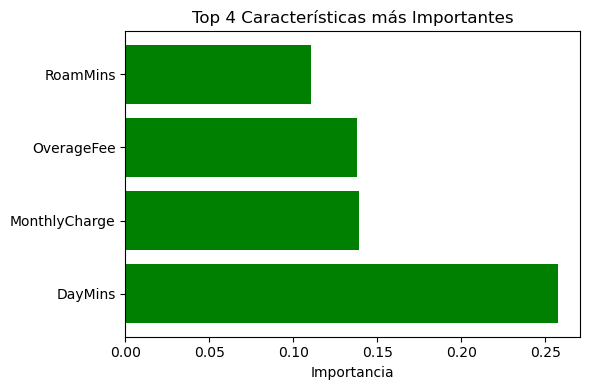

In [ ]:
# modelo de ensamble Random Forest usando como hiper parámetro n_estimators = 45
# Crear y entrenar el modelo
model_rf = RandomForestRegressor(
    n_estimators=45,
    oob_score=True,
    random_state=42,
    bootstrap=True,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)

# 2. Mostrar el OOB Score
print(f"OOB R² Score (estimación del ajuste): {model_rf.oob_score_:.4f}")

# 3. Evaluar el modelo en el conjunto de prueba
y_pred = model_rf.predict(X_test)

print("\nDesempeño en el conjunto de test:")
print(f"R² Score:              {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error:   {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False):.4f}")

# 4. Visualizar las 4 características más importantes
importancias = model_rf.feature_importances_
top_idx = np.argsort(importancias)[-4:][::-1]

plt.figure(figsize=(6, 4))
plt.barh(
    y=model_rf.feature_names_in_[top_idx],
    width=importancias[top_idx],
    color='green'
)
plt.xlabel("Importancia")
plt.title("Top 4 Características más Importantes")
plt.tight_layout()
plt.show()

In [ ]:
%%time
# búsqueda de grilla para un modelo Random Forest
# Modelo regresivo
# permite medir el tiempo de ejecución de la celda en la que se encuentra. Esto
# dará el tiempo total que lleva ejecutar la búsqueda de hiperparámetros.

param_grid = {
    'n_estimators': np.arange(50, 200, 10, dtype='int'),
    'max_features': ['sqrt', 'log2', None]
}

'''
Define la cuadrícula de hiperparámetros que se probarán durante la búsqueda.
Estamos probando diferentes valores para el número de estimadores (n_estimators)
 y las características máximas (max_features) en cada árbol.
'''

grid_model4 = GridSearchCV(
    RandomForestRegressor(oob_score=True, random_state=RSTATE),
    param_grid=param_grid,
    n_jobs=-1,
    cv=5
)
'''
Se realiza la búsqueda de hiperparámetros utilizando validación cruzada. Se le
pasa el modelo base (RandomForestRegressor con algunos parámetros predeterminados),
 la cuadrícula de hiperparámetros (param_grid), el número de trabajadores a
 utilizar en paralelo (n_jobs=-1 significa utilizar todos los núcleos
 disponibles), y el número de divisiones para la validación cruzada
 (cv=5 significa validación cruzada de 5 pliegues).
'''


grid_model4.fit(X_train, y_train)

CPU times: total: 1.8 s
Wall time: 1min 11s


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True,
                                             random_state=23124),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [ ]:
print('\n---')
print('Mejores valores de hiper parámetros encontrados:')
print(grid_model4.best_params_)
print('---\n')


---
Mejores valores de hiper parámetros encontrados:
{'max_features': 'sqrt', 'n_estimators': 170}
---



In [ ]:
# prediction para conjunto de test
yhat_test = grid_model4.best_estimator_.predict(X_test)

# prediction para conjunto de test
yhat_train = grid_model4.best_estimator_.predict(X_train)

# medir el desempeño del modelo conjunto de train
print('\n---\nConjunto de train')
print(f'r2: {r2_score(y_train, yhat_train)}')
print(f'MSE: {mean_squared_error(y_train, yhat_train)}')


# medir el desempeño del modelo conjunto de test
print("\nDesempeño en el conjunto de prueba:")
print(f"R² Score:             {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error:  {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False):.4f}")


---
Conjunto de train
r2: 0.9373352739951928
MSE: 0.0076129836039154734

Desempeño en el conjunto de prueba:
R² Score:             0.5645
Mean Absolute Error:  0.1173
Root Mean Squared Error: 0.2368


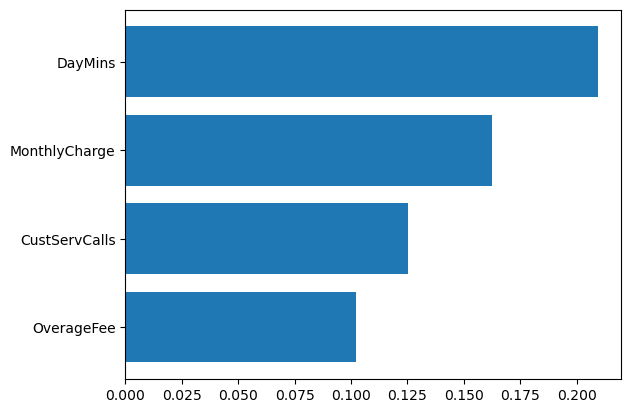

In [ ]:
# visualizar importancia de los atributos del modelo
model4 = grid_model4.best_estimator_
idx_sort = np.argsort(model4.feature_importances_)
plt.barh(y=model4.feature_names_in_[idx_sort[-4:]], width=model4.feature_importances_[idx_sort[-4:]]);

In [ ]:
model4.oob_score_

0.5429268373847291

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modelo clasificatorio
# búsqueda de grilla para un modelo Random Forest
# permite medir el tiempo de ejecución de la celda en la que se encuentra. Esto
# dará el tiempo total que lleva ejecutar la búsqueda de hiperparámetros.

param_grid = {
    'n_estimators': np.arange(50, 200, 10, dtype='int'),
    'max_features': ['sqrt', 'log2', None]
}

'''
Define la cuadrícula de hiperparámetros que se probarán durante la búsqueda.
Estamos probando diferentes valores para el número de estimadores (n_estimators)
 y las características máximas (max_features) en cada árbol.
'''

grid_model4 = GridSearchCV(
    RandomForestClassifier(oob_score=True, random_state=RSTATE),
    param_grid=param_grid,
    n_jobs=-1,
    cv=5
)
'''
Se realiza la búsqueda de hiperparámetros utilizando validación cruzada. Se le
pasa el modelo base (RandomForestClassifier con algunos parámetros predeterminados),
la cuadrícula de hiperparámetros (param_grid), el número de trabajadores a
utilizar en paralelo (n_jobs=-1 significa utilizar todos los núcleos
disponibles), y el número de divisiones para la validación cruzada
(cv=5 significa validación cruzada de 5 pliegues).
'''


grid_model4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=23124),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [ ]:
print('\n---')
print('Mejores valores de hiper parámetros encontrados:')
print(grid_model4.best_params_)
print('---\n')


---
Mejores valores de hiper parámetros encontrados:
{'max_features': 'sqrt', 'n_estimators': 180}
---



In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score
)

# Obtener el mejor modelo
best_model = grid_model4.best_estimator_

# Predicciones sobre el conjunto de prueba
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilidad clase positiva

# Métricas de evaluación
print("\nDesempeño en el conjunto de prueba:")
print(f"Accuracy :  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision:  {precision_score(y_test, y_pred):.4f}")
print(f"Recall   :  {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score :  {f1_score(y_test, y_pred):.4f}")
print(f"AUC      :  {roc_auc_score(y_test, y_prob):.4f}")


Desempeño en el conjunto de prueba:
Accuracy :  0.9355
Precision:  0.8934
Recall   :  0.6527
F1 Score :  0.7543
AUC      :  0.9045


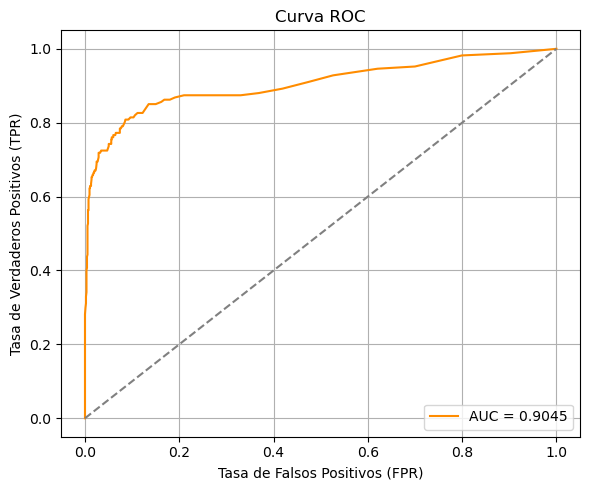

In [ ]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.4f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### 15 CLIENTES CON MAYOR PROPENSIÓN A RENUNCIAR

In [ ]:
# Obtener las probabilidades de la clase positiva (renuncia)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Convertimos a DataFrame para combinar con X_test si no lo es
X_test_df = X_test.copy()
if not isinstance(X_test_df, pd.DataFrame):
    X_test_df = pd.DataFrame(X_test, columns=best_model.feature_names_in_)

# Añadimos la columna de probabilidad de renuncia
X_test_df['prob_renuncia'] = y_prob

# Ordenamos por mayor probabilidad
top_15 = X_test_df.sort_values(by='prob_renuncia', ascending=False).head(15)

# Mostramos los 15 clientes con mayor propensión a renunciar
print("Top 15 clientes con mayor probabilidad de renunciar:")
display(top_15)

Top 15 clientes con mayor probabilidad de renunciar:


,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,prob_renuncia
2647,116,1,0,0.00,0,288.0,120,71.0,12.79,13.4,0.994444
2536,119,1,0,0.00,0,294.2,100,70.0,11.63,9.0,0.994444
3268,84,1,0,0.00,2,289.1,100,70.0,11.69,12.7,0.994444
1679,82,1,0,0.00,0,329.8,73,74.0,10.42,10.6,0.994444
3079,88,1,0,0.00,5,131.5,99,38.0,8.74,7.9,0.983333
1078,80,1,0,0.00,0,322.3,113,74.0,11.10,6.7,0.983333
2924,96,1,0,0.00,1,276.9,105,69.0,12.35,10.3,0.966667
1619,149,1,0,0.00,4,119.2,88,35.0,8.42,12.2,0.961111
3113,108,1,0,0.27,2,291.6,99,71.7,11.06,14.0,0.955556
1538,113,1,0,0.00,5,61.2,111,19.0,4.62,13.7,0.955556
